<a href="https://colab.research.google.com/github/profshai/Python-MachineLearning-DeepLearning-Projects/blob/master/Recurrent_Neural_Networks_Example_for_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN Example for Sine Wave

RNN is used for sequences of data (order is important here). Examples of sequences include:
* Time series data (sales)
* Sentences
* Audio
* Car trajectories
* Music



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = np.linspace(0,50,501)
y = np.sin(x)

In [0]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [0]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

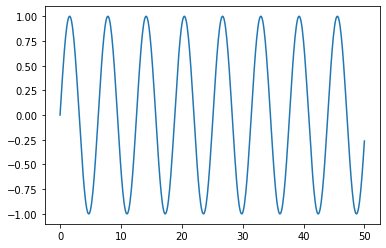

In [0]:
plt.plot(x,y)

In [0]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [0]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


## Train Test Split

In [0]:
len(df)

501

In [0]:
test_percent = 0.1

In [0]:
len(df)*test_percent

50.1

In [0]:
test_point = np.round(len(df)*test_percent)

In [0]:
test_ind = int(len(df) - test_point)

In [0]:
test_ind

451

In [0]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [0]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [0]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


## Scale Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [0]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [0]:
#scaled_train

In [0]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [0]:
len(scaled_train)

451

In [0]:
len(generator) # n_input = 2,,,,Generator=scaled_train-length

449

In [0]:
# What does the first batch look like?
X,y = generator[0]

In [0]:
X #The two values of X is based on the length specified

array([[[0.49999912],
        [0.54991622]]])

In [0]:
y #Given the two values of X, we predict this y

array([[0.59933458]])

In [0]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622]
Predict this y: 
 [[0.59933458]]


In [0]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [0]:
# What does the first batch look like?
X,y = generator[0]

In [0]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.49999912 0.54991622 0.59933458 0.64776041 0.69470985 0.73971381
 0.78232262 0.82211054 0.85868004 0.89166571]
Predict this y: 
 [[0.92073798]]


In [0]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

### Create the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [0]:
# We're only using one feature in our time series
n_features = 1

In [0]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features))) #50 neurons

# Final Prediction__we want a single number
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [0]:
# fit model
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 3s 7ms/step - loss: 0.0074
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 1.1514e-05
Epoch 3/5
401/401 [==============================] - 3s 6ms/step - loss: 1.4997e-05
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 5.0350e-04
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 2.6086e-05


In [0]:
model.history.history.keys()

dict_keys(['loss'])

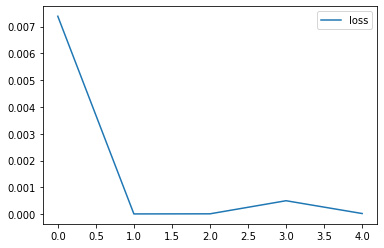

In [0]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [0]:
#last 25 points in the training set to predict one point into the future (the first point in the test set)
first_eval_batch = scaled_train[-length:]

In [0]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [0]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [0]:
#we predict now
model.predict(first_eval_batch)

array([[0.9484838]], dtype=float32)

In [0]:
scaled_test[0] #This is close

array([0.94955134])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [0]:
current_batch.shape

(1, 50, 1)

In [0]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [0]:
#grab everything in first and last dimensions, but in the actual dimension holding the data, go from 1 to the end,
predicted_value=[[[99]]]
np.append(current_batch[:,1:,:],[[[99]]],axis=1) 
#we drop 8.37405820e-01 and predict 9.90000000e+01 which is the future (in the test set)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [0]:
#we build a loop to go through the test data
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
test_predictions

[array([0.9484838], dtype=float32),
 array([0.96806246], dtype=float32),
 array([0.98295], dtype=float32),
 array([0.9924389], dtype=float32),
 array([0.99725777], dtype=float32),
 array([0.99708045], dtype=float32),
 array([0.9910108], dtype=float32),
 array([0.98055154], dtype=float32),
 array([0.9657243], dtype=float32),
 array([0.94519174], dtype=float32),
 array([0.92060864], dtype=float32),
 array([0.8924793], dtype=float32),
 array([0.85924166], dtype=float32),
 array([0.82282203], dtype=float32),
 array([0.78424627], dtype=float32),
 array([0.7418951], dtype=float32),
 array([0.69764704], dtype=float32),
 array([0.6529262], dtype=float32),
 array([0.60569036], dtype=float32),
 array([0.5573459], dtype=float32),
 array([0.5100809], dtype=float32),
 array([0.46123108], dtype=float32),
 array([0.4122041], dtype=float32),
 array([0.36601007], dtype=float32),
 array([0.31946534], dtype=float32),
 array([0.2735993], dtype=float32),
 array([0.23256466], dtype=float32),
 array([0.19254

In [0]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


## Inverse Transformations and Compare

In [0]:
true_predictions = scaler.inverse_transform(test_predictions)

In [0]:
true_predictions

array([[ 0.89696222],
       [ 0.93611918],
       [ 0.96589396],
       [ 0.98487169],
       [ 0.99450933],
       [ 0.99415468],
       [ 0.98201546],
       [ 0.96109714],
       [ 0.93144287],
       [ 0.8903781 ],
       [ 0.8412123 ],
       [ 0.78495407],
       [ 0.71847933],
       [ 0.64564066],
       [ 0.56848974],
       [ 0.48378804],
       [ 0.39529267],
       [ 0.30585173],
       [ 0.21138079],
       [ 0.1146927 ],
       [ 0.02016335],
       [-0.07753544],
       [-0.17558865],
       [-0.26797594],
       [-0.36106466],
       [-0.452796  ],
       [-0.53486462],
       [-0.61490286],
       [-0.69198875],
       [-0.75478679],
       [-0.81262938],
       [-0.86742006],
       [-0.90378627],
       [-0.93338121],
       [-0.96219496],
       [-0.96924662],
       [-0.96836366],
       [-0.97139907],
       [-0.94976088],
       [-0.91819954],
       [-0.89769681],
       [-0.84969967],
       [-0.78800578],
       [-0.74774004],
       [-0.67701892],
       [-0

In [0]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [0]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
test

,Sine,Predictions
45.1,0.899097,0.896962
45.2,0.938307,0.936119
45.3,0.968142,0.965894
45.4,0.988304,0.984872
45.5,0.998591,0.994509
45.6,0.998900,0.994155
45.7,0.989229,0.982015
45.8,0.969673,0.961097
45.9,0.940429,0.931443
46.0,0.901788,0.890378


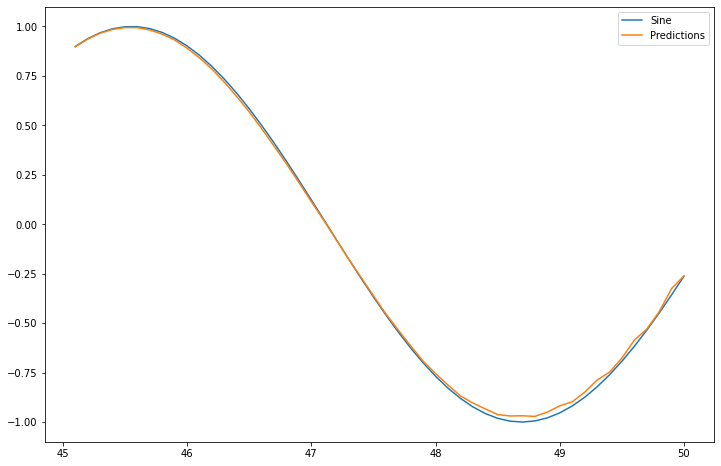

In [65]:
test.plot(figsize=(12,8)) #Our predictions look good

## Adding in Early Stopping and Validation Generator

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)

#len(scaled_test) data (50) > length of batches (49)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)
#Take 49 points and predict 50th

# LSTMS

In [0]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [73]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 7s 16ms/step - loss: 0.0156 - val_loss: 1.0400e-04
Epoch 2/20
402/402 [==============================] - 6s 15ms/step - loss: 1.4190e-04 - val_loss: 7.0613e-05
Epoch 3/20
402/402 [==============================] - 6s 15ms/step - loss: 2.4241e-04 - val_loss: 8.7806e-05
Epoch 4/20
402/402 [==============================] - 6s 16ms/step - loss: 2.5473e-04 - val_loss: 2.5754e-05
Epoch 5/20
402/402 [==============================] - 6s 16ms/step - loss: 1.1998e-04 - val_loss: 1.3258e-05
Epoch 6/20
402/402 [==============================] - 6s 15ms/step - loss: 3.7915e-04 - val_loss: 3.2759e-06
Epoch 7/20
402/402 [==============================] - 6s 15ms/step - loss: 2.4560e-05 - val_loss: 5.9829e-07
Epoch 8/20
402/402 [==============================] - 6s 15ms/step - loss: 3.8365e-05 - val_loss: 9.7345e-05
Epoch 9/20
402/402 [==============================] - 6s 15ms/step - loss: 1.0847e-04 - val_loss: 6.2098e-06


In [0]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


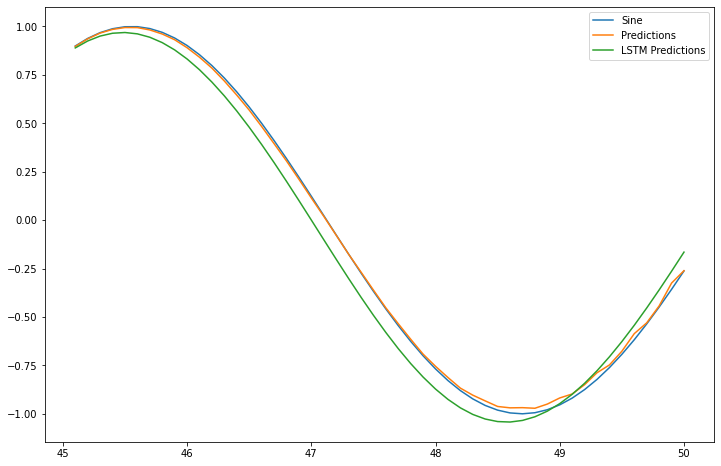

In [75]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

## Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [0]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [0]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [79]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=9)

Epoch 1/9
451/451 [==============================] - 7s 16ms/step - loss: 0.0176
Epoch 2/9
451/451 [==============================] - 7s 15ms/step - loss: 1.5796e-04
Epoch 3/9
451/451 [==============================] - 7s 15ms/step - loss: 1.2236e-04
Epoch 4/9
451/451 [==============================] - 7s 15ms/step - loss: 4.9569e-04
Epoch 5/9
451/451 [==============================] - 7s 15ms/step - loss: 6.5664e-05
Epoch 6/9
451/451 [==============================] - 7s 15ms/step - loss: 7.6121e-05
Epoch 7/9
451/451 [==============================] - 7s 15ms/step - loss: 3.9129e-04
Epoch 8/9
451/451 [==============================] - 7s 15ms/step - loss: 6.6383e-05
Epoch 9/9
451/451 [==============================] - 7s 15ms/step - loss: 1.1442e-04


In [0]:
#forecasting the future
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [0]:
forecast = scaler.inverse_transform(forecast)

In [82]:
forecast 

array([[-0.16979316],
       [-0.06873125],
       [ 0.03308542],
       [ 0.13470361],
       [ 0.23512816],
       [ 0.33330851],
       [ 0.42816424],
       [ 0.51860737],
       [ 0.60356882],
       [ 0.68201922],
       [ 0.75299503],
       [ 0.81561719],
       [ 0.8691117 ],
       [ 0.91282599],
       [ 0.94624318],
       [ 0.96899052],
       [ 0.98084304],
       [ 0.98172387],
       [ 0.97170024],
       [ 0.95097385],
       [ 0.91986822],
       [ 0.87881895],
       [ 0.82835401],
       [ 0.76908887],
       [ 0.70170779],
       [ 0.62695868],
       [ 0.54564215],
       [ 0.45860731],
       [ 0.36674477],
       [ 0.27098293],
       [ 0.17228225],
       [ 0.07163108],
       [-0.02995958],
       [-0.1314619 ],
       [-0.23183966],
       [-0.33005308],
       [-0.42507214],
       [-0.51588499],
       [-0.60151299],
       [-0.6810262 ],
       [-0.75355969],
       [-0.81833133],
       [-0.87465769],
       [-0.92196764],
       [-0.95981077],
       [-0

In [83]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [84]:
len(forecast)

50

In [86]:
50*0.1 #predicted 50 points with a stepsize of 0.1 so we move from 50.1 to 55.1

5.0

In [0]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [88]:
len(forecast_index)

50

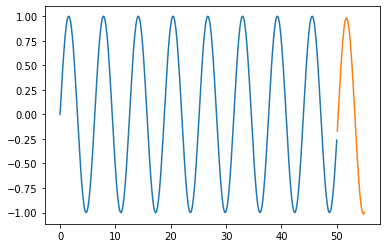

In [89]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)

End of Notebook!